In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


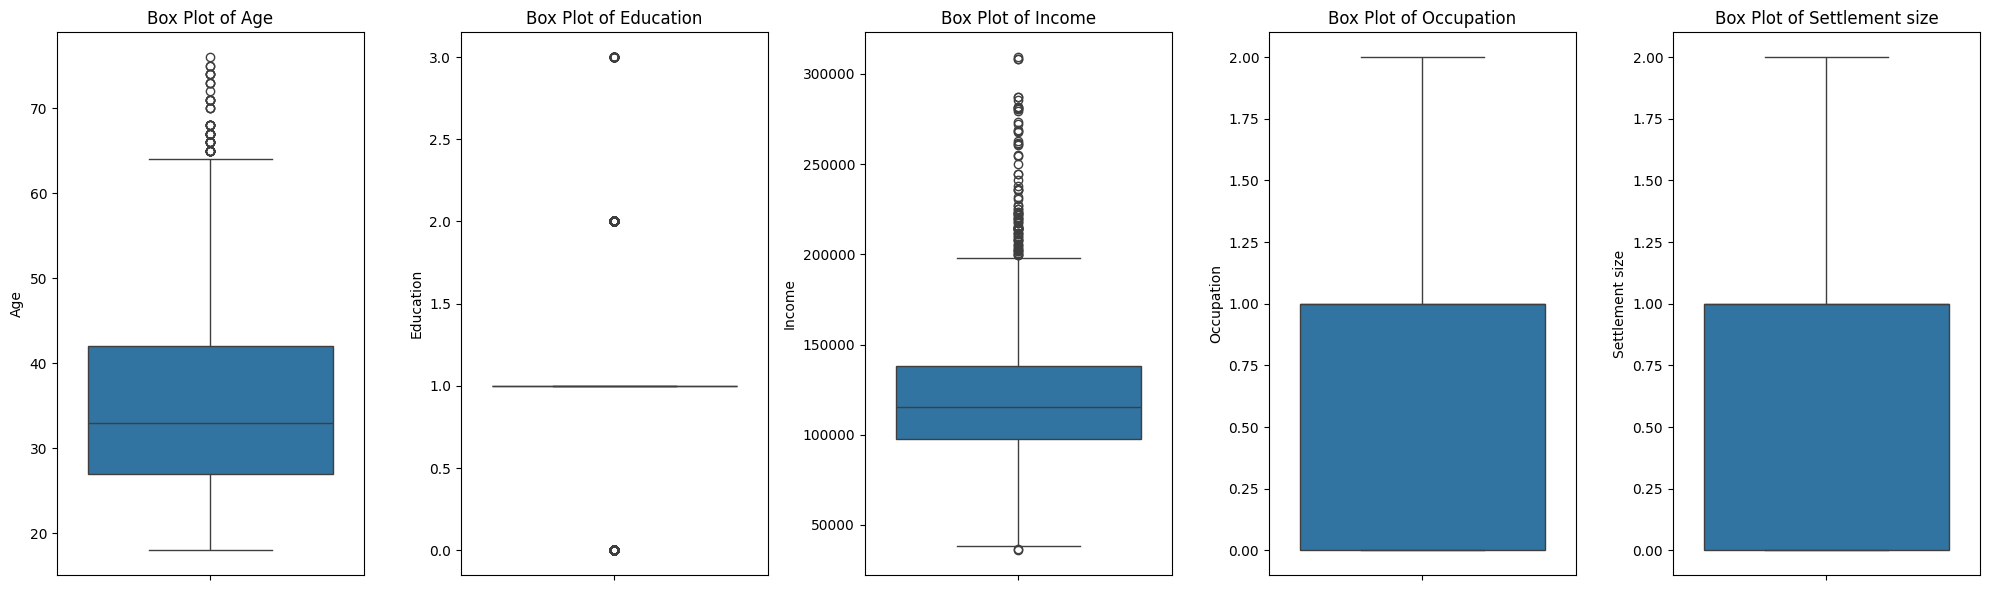

In [ ]:
columns = ['Age','Education','Income','Occupation',	'Settlement size']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
df = df.copy()

columns_to_clean = ['Age', 'Income']

for col in columns_to_clean:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
        print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")


print(f"Data shape after removing outliers in 'Age' and 'Income': {df.shape}")


Number of outliers in Age: 57
Number of outliers in Income: 83
Data shape after removing outliers in 'Age' and 'Income': (2000, 10)


In [ ]:
df_cleaned = df[~(df['Age_outlier'] | df['Income_outlier'])]
print(f"Data shape after removing outliers: {df_cleaned.shape}")


Data shape after removing outliers: (1870, 10)


In [ ]:
df=df_cleaned
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_outlier,Income_outlier
1,100000002,1,1,22,1,150773,1,2,False,False
2,100000003,0,0,49,1,89210,0,0,False,False
3,100000004,0,0,45,1,171565,1,1,False,False
4,100000005,0,0,53,1,149031,1,1,False,False
5,100000006,0,0,35,1,144848,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,False,False
1996,100001997,1,1,27,1,117744,1,0,False,False
1997,100001998,0,0,31,0,86400,0,0,False,False
1998,100001999,1,1,24,1,97968,0,0,False,False


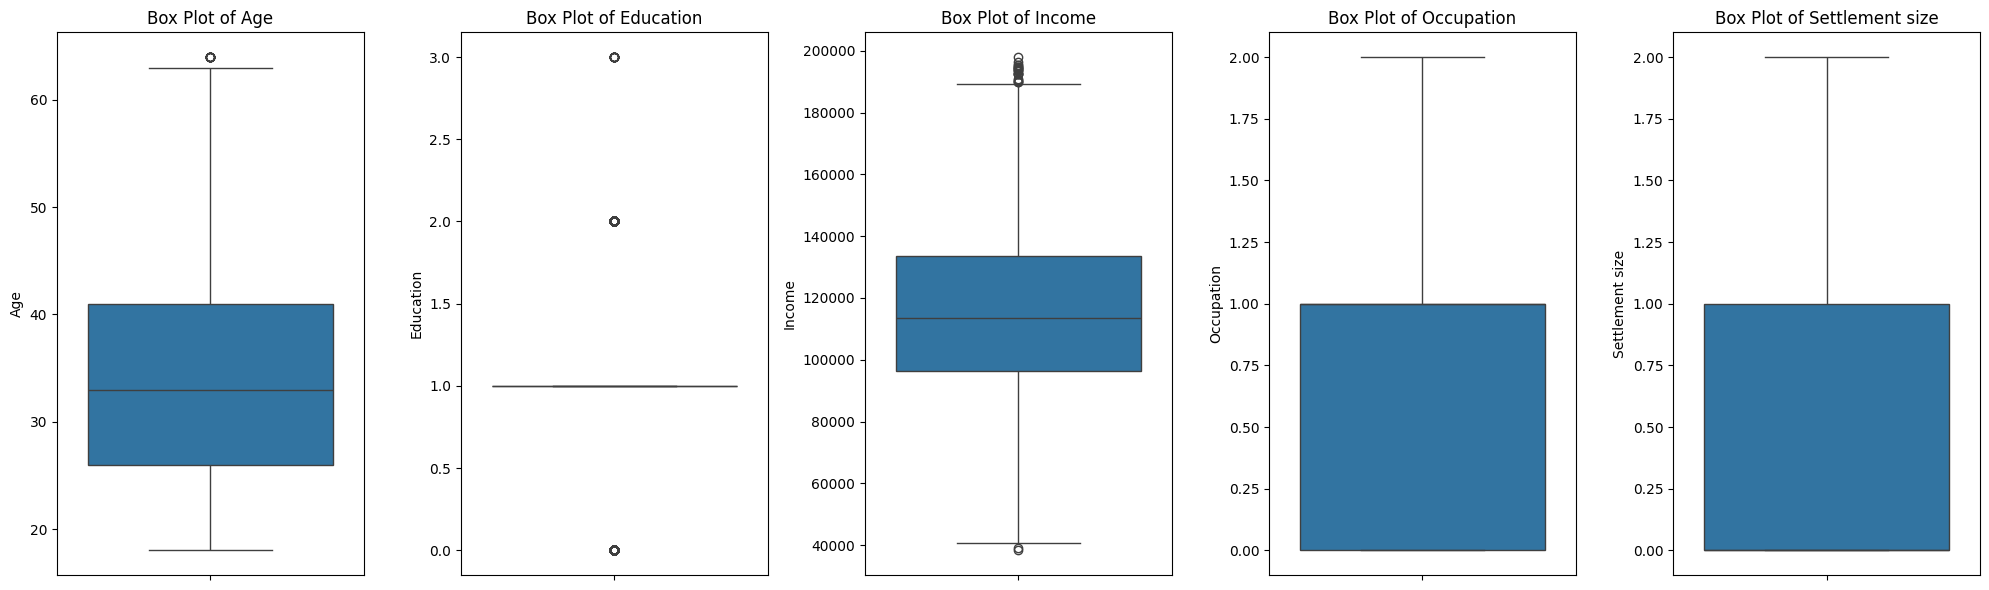

In [ ]:

columns = ['Age','Education','Income','Occupation',	'Settlement size']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

                      Age  Education    Income  Occupation  Settlement size
Age              1.000000   0.583993  0.310075    0.047801         0.096120
Education        0.583993   1.000000  0.205499    0.020115         0.014065
Income           0.310075   0.205499  1.000000    0.659303         0.491866
Occupation       0.047801   0.020115  0.659303    1.000000         0.558690
Settlement size  0.096120   0.014065  0.491866    0.558690         1.000000


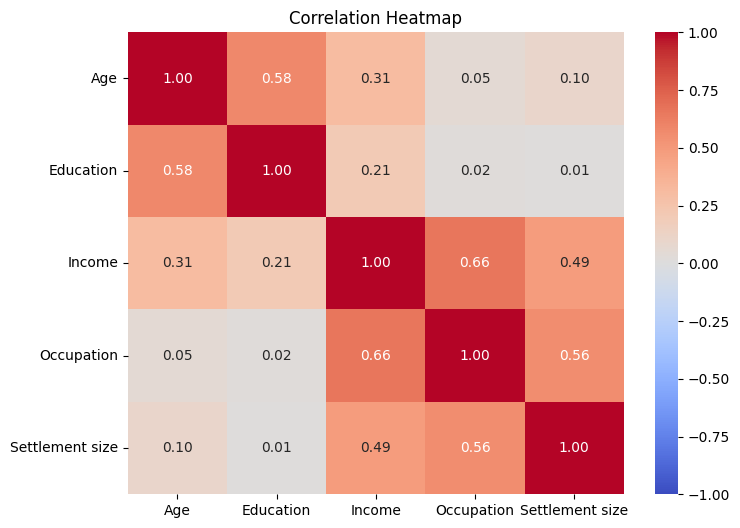

In [ ]:
correlation = df[['Age','Education','Income','Occupation',	'Settlement size']].corr()
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

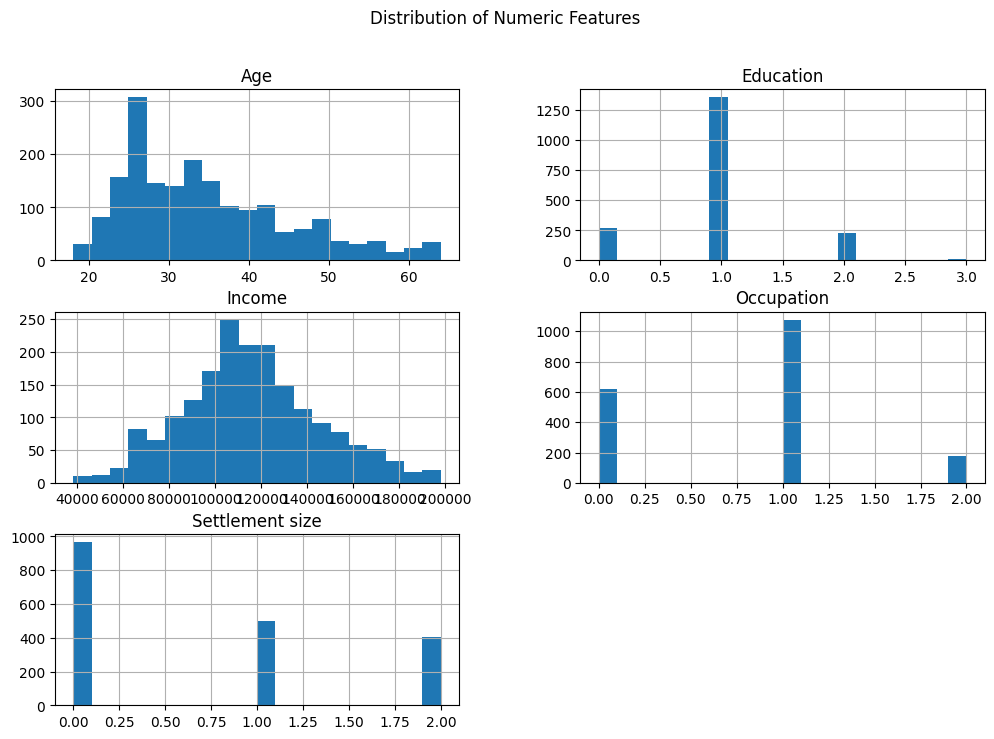

In [ ]:
df[['Age','Education','Income','Occupation',	'Settlement size']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [ ]:

df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_outlier,Income_outlier
1,100000002,1,1,22,1,150773,1,2,False,False
2,100000003,0,0,49,1,89210,0,0,False,False
3,100000004,0,0,45,1,171565,1,1,False,False
4,100000005,0,0,53,1,149031,1,1,False,False
5,100000006,0,0,35,1,144848,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,False,False
1996,100001997,1,1,27,1,117744,1,0,False,False
1997,100001998,0,0,31,0,86400,0,0,False,False
1998,100001999,1,1,24,1,97968,0,0,False,False


In [ ]:
df_cluster = df
from sklearn.cluster import KMeans

X = df_cluster[['Sex', 'Marital status', 'Education', 'Age' , 'Income' ,'Occupation', 'Settlement size']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

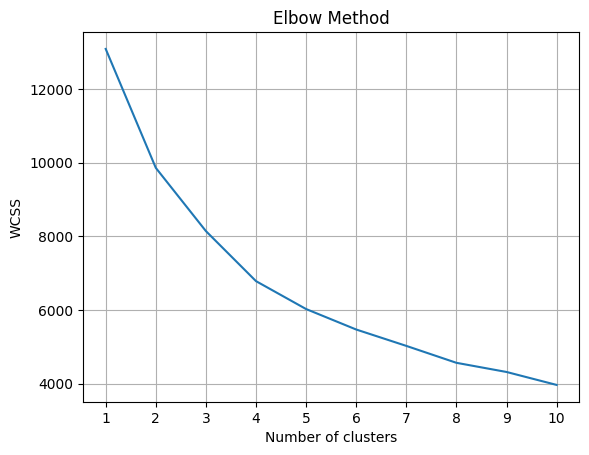

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
optimal_k = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, df_cluster['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=4: 0.2701548556844778


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cluster)
y_pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_cluster['Cluster'] = y_pred
df_cluster

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_outlier,Income_outlier,Cluster
1,100000002,1,1,22,1,150773,1,2,False,False,1
2,100000003,0,0,49,1,89210,0,0,False,False,2
3,100000004,0,0,45,1,171565,1,1,False,False,1
4,100000005,0,0,53,1,149031,1,1,False,False,1
5,100000006,0,0,35,1,144848,0,0,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,False,False,3
1996,100001997,1,1,27,1,117744,1,0,False,False,3
1997,100001998,0,0,31,0,86400,0,0,False,False,2
1998,100001999,1,1,24,1,97968,0,0,False,False,0


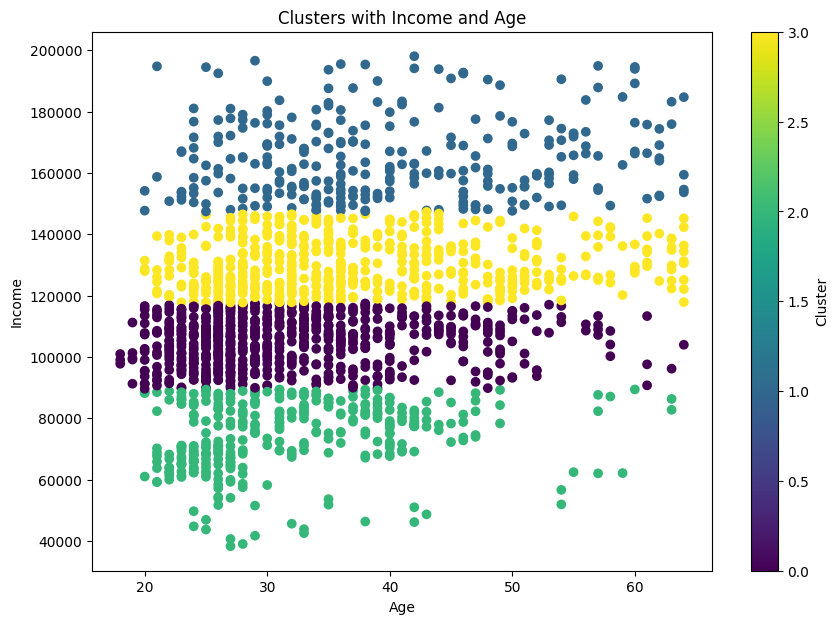

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(df_cluster['Age'], df_cluster['Income'],
            c=df_cluster['Cluster'], cmap='viridis', marker='o')

plt.xlabel('Age')
plt.ylabel('Income')

plt.title('Clusters with Income and Age')

plt.colorbar(label='Cluster')

plt.show()


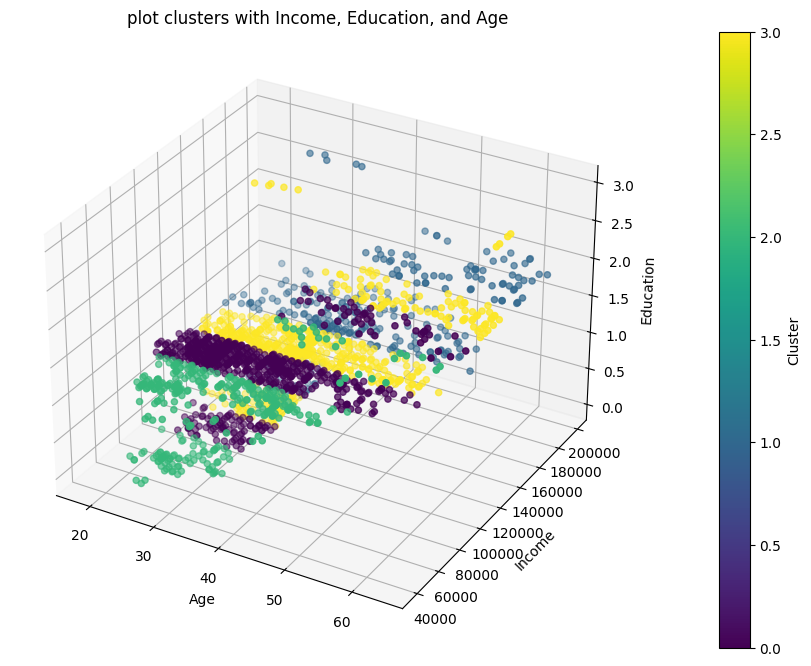

In [ ]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_cluster['Age'], df_cluster['Income'], df_cluster['Education'],
                c=df_cluster['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education')
ax.set_title('plot clusters with Income, Education, and Age')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()